In [38]:
# https://github.com/gering92

*Homework 1 - Gerin George*

Parameter Values:  [ 2.17175315  0.90932519  0.73248809 31.45278269]
Error: 1.5927258504240172


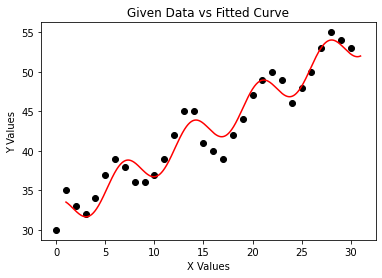

In [39]:
# (I)
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

x = np.arange(0,31)
y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

def temp(c, x, y):
    e2 = np.sqrt(np.sum((c[0] * np.cos(c[1] * x) + c[2] * x + c[3] - y) ** 2) / (len(y)))
    return e2

#initial guess
c0 = np.array([5, np.pi/6, 12, 30])

#performing optimization
res = opt.minimize(temp, c0, args=(x, y), method='Nelder-Mead')

c = res.x

tt = np.arange(1, 31.01, 0.01)
yfit = (c[0] * np.cos(c[1]*tt) + c[2]*tt + c[3])

# Optimized values of A, B, C, and D
print("Parameter Values: ", c)

#error
print("Error:", temp(c, x, y))

#plotting
plt.plot(x, y, 'ko')
plt.plot(tt, yfit, 'r-')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Given Data vs Fitted Curve')
plt.show()


/var/folders/mm/bwdqqwfs0y3247yqgd_vb4rr0000gn/T/ipykernel_20660/3323992911.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(D_range, C_range, CD_error_grid)
/var/folders/mm/bwdqqwfs0y3247yqgd_vb4rr0000gn/T/ipykernel_20660/3323992911.py:46: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(D_range, B_range, BD_error_grid)
/var/folders/mm/bwdqqwfs0y3247yqgd_vb4rr0000gn/T/ipykernel_20660/3323992911.py:61: MatplotlibDeprecationWarning: sha

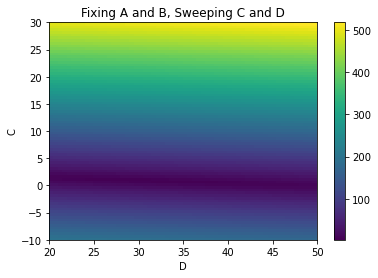

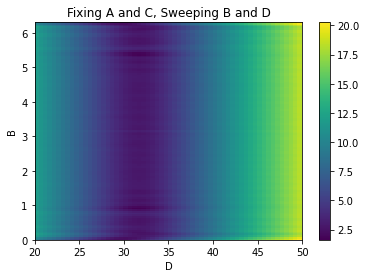

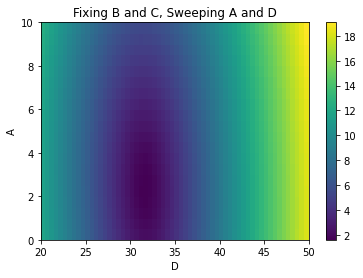

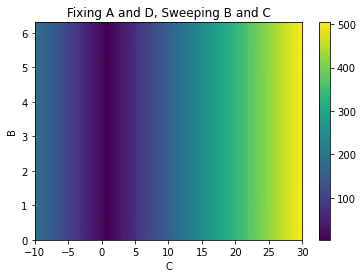

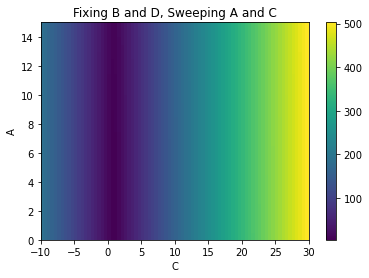

/var/folders/mm/bwdqqwfs0y3247yqgd_vb4rr0000gn/T/ipykernel_20660/3323992911.py:105: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(B_range, A_range, AB_error_grid)


Text(0.5, 1.0, 'Fixing C and D, Sweeping A and B')

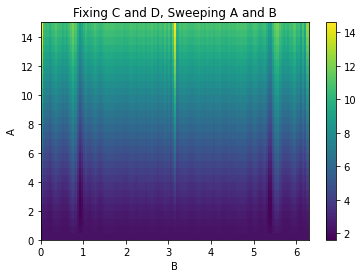

In [40]:
# (II)

# Define the data
X = np.arange(0,31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Define the objective function
def temp(c, x, y):
    e2 = np.sqrt(np.sum((c[0] * np.cos(c[1] * x) + c[2] * x + c[3] - y) ** 2) / (len(y)))
    return e2

# Set the initial guess
c0 = np.array([5, np.pi/6, 12, 30])

# Perform optimization
res = opt.minimize(temp, c0, args=(X, Y), method='Nelder-Mead')
c = res.x

# Generate the fitted curve
tt = np.arange(1, 31.01, 0.01)
yfit = (c[0] * np.cos(c[1]*tt) + c[2]*tt + c[3])

# Fixing A and B, sweeping C and D
plt.figure()
C_range = np.arange(-10, 30.5, 0.5)
D_range = np.arange(20, 50.5, 0.5)
CD_error_grid = np.zeros((len(C_range), len(D_range)))
for i, C in enumerate(C_range):
    for j, D in enumerate(D_range):
        CD_error_grid[i, j] = temp([c[0], c[1], C, D], X, Y)
plt.pcolor(D_range, C_range, CD_error_grid)
plt.colorbar()
plt.xlabel('D')
plt.ylabel('C')
plt.title('Fixing A and B, Sweeping C and D')

# Fixing A and C, sweeping B and D
plt.figure()
B_range = np.arange(0, 2*np.pi + 0.05, 0.05)
D_range = np.arange(20, 50.5, 0.5)
BD_error_grid = np.zeros((len(B_range), len(D_range)))
for i, B in enumerate(B_range):
    for j, D in enumerate(D_range):
        BD_error_grid[i, j] = temp([c[0], B, c[2], D], X, Y)
plt.pcolor(D_range, B_range, BD_error_grid)
plt.colorbar()
plt.xlabel('D')
plt.ylabel('B')
plt.title('Fixing A and C, Sweeping B and D')


# Fixing B and C, sweeping A and D
plt.figure()
A_range = np.arange(0, 10.5, 0.5)
D_range = np.arange(20, 50.5, 0.5)
AD_error_grid = np.zeros((len(A_range), len(D_range)))
for i, A in enumerate(A_range):
    for j, D in enumerate(D_range):
        AD_error_grid[i, j] = temp([A, c[1], c[2], D], X, Y)
plt.pcolor(D_range, A_range, AD_error_grid)
plt.colorbar()
plt.xlabel('D')
plt.ylabel('A')
plt.title('Fixing B and C, Sweeping A and D')

# Fixing A and D, sweeping B and C
plt.figure()
B_range = np.arange(0, 2*np.pi + 0.05, 0.05)
C_range = np.arange(-10, 30.5, 0.5)
BC_error_grid = np.zeros((len(B_range), len(C_range)))
for i, B in enumerate(B_range):
    for j, C in enumerate(C_range):
        BC_error_grid[i, j] = temp([c[0], B, C, c[3]], X, Y)
plt.pcolor(C_range, B_range, BC_error_grid)
plt.colorbar()
plt.xlabel('C')
plt.ylabel('B')
plt.title('Fixing A and D, Sweeping B and C')

# Fixing B and D, sweeping A and C
plt.figure()
A_range = np.arange(0, 15.5, 0.5)
C_range = np.arange(-10, 30.5, 0.5)
AC_error_grid = np.zeros((len(A_range), len(C_range)))
for i, A in enumerate(A_range):
    for j, C in enumerate(C_range):
        AC_error_grid[i, j] = temp([A, c[1], C, c[3]], X, Y)
plt.pcolor(C_range, A_range, AC_error_grid)
plt.colorbar()
plt.xlabel('C')
plt.ylabel('A')
plt.title('Fixing B and D, Sweeping A and C')

plt.show()

# Fixing C and D, sweeping A and B
plt.figure()
A_range = np.arange(0, 15.5, 0.5)
B_range = np.arange(0, 2*np.pi + 0.05, 0.05)
AB_error_grid = np.zeros((len(A_range), len(B_range)))
for i, A in enumerate(A_range):
    for j, B in enumerate(B_range):
        AB_error_grid[i, j] = temp([A, B, c[2], c[3]], X, Y)
plt.pcolor(B_range, A_range, AB_error_grid)
plt.colorbar()
plt.xlabel('B')
plt.ylabel('A')
plt.title('Fixing C and D, Sweeping A and B')



In [63]:
#(III)

# Define the data
x = np.arange(0,31)
y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

x_training = x[:20]
x_test = x[20:]

#x_training = np.arange(len(training_data))
#x_test = np.arange(len(test_data))

training_data = y[:20]
test_data = y[20:]

# Fit data to a line
line_fit = np.polyfit(x_training, training_data, 1)

def line_error(c, x, y):
    line_e2 = np.sqrt(np.sum((c[0] * x + c[1] - y)**2) / len(y))
    return line_e2

# Fit data to a parabola
parabola_fit = np.polyfit(x_training, training_data, 2)

# error calculation for parabola
def parabola_error(c, x, y):
    predicted_y = np.polyval(c, x)
    parabola_e2 = np.sqrt(np.sum((predicted_y - y)**2) / len(y))
    return parabola_e2

# Fit data to a 19th degree polynomial
polynomial_fit = np.polyfit(x_training, training_data, 19)

# Error calculation for deg 19 polynomial
def poly_error(c, x, y):
    predicted_y = np.polyval(c, x)
    polynomial_e2 = np.sqrt(np.sum((predicted_y - y)**2) / len(y))
    return polynomial_e2


# Compute the least-square error for each model over the training points
line_error_train = line_error(line_fit, x_training, training_data)
parabola_error_train = parabola_error(parabola_fit, x_training, training_data)
polynomial_error_train = poly_error(polynomial_fit, x_training, training_data)

# Compute least-square error over test data
line_error_test = line_error(line_fit, x_test, test_data)
parabola_error_test = parabola_error(parabola_fit, x_test, test_data)
polynomial_error_test = poly_error(polynomial_fit, x_test, test_data)


print("Least square error for line (training data):", line_error_train)
print("Least square error for line (test data):", line_error_test)
print("\n")
print("Least square error for parabola (training data):", parabola_error_train)
print("Least square error for parabola (test data):", parabola_error_test)
print("\n")
print("Least square error for 19th degree polynomial (training data):", polynomial_error_train)
print("Least square error for 19th degree polynomial (test data):", polynomial_error_test)


Least square error for line (training data): 2.242749386808538
Least square error for line (test data): 3.36363873604787


Least square error for parabola (training data): 2.1255393482773766
Least square error for parabola (test data): 8.713651781874919


Least square error for 19th degree polynomial (training data): 0.028351503968806435
Least square error for 19th degree polynomial (test data): 28617752784.428474


/Users/geringeorge/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
#(IV)

# Define the data
x = np.arange(0,31)
y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Split the data into training and test data
training_data = np.concatenate((y[:10], y[-10:]))
test_data = y[10:21]

#x_training = np.arange(len(training_data))
#x_test = np.arange(len(test_data))

x_training = x[:20]
x_test = x[20:]


line_fit = np.polyfit(x_training, training_data, 1)
parabola_fit = np.polyfit(x_training, training_data, 2)
polynomial_fit = np.polyfit(x_training, training_data, 19)


def line_error(c, x, y):
    line_e2 = np.sqrt(np.sum((c[0] * x + c[1] - y)**2) / len(y))
    return line_e2

# error calculation for parabola
def parabola_error(c, x, y):
    parabola_e2 = np.sqrt(np.sum((np.polyval(c, x) - y)**2) / len(y))
    return parabola_e2


# Error calculation for deg 19 polynomial
def poly_error(c, x, y):
    predicted_y = np.polyval(c, x)
    polynomial_e2 = np.sqrt(np.sum((predicted_y - y)**2) / len(y))
    return polynomial_e2

# Compute the least-square error for each model over the training points
line_error_train = line_error(line_fit, x_training, training_data)
parabola_error_train = parabola_error(parabola_fit, x_training, training_data)
polynomial_error_train = poly_error(polynomial_fit, x_training, training_data)

# Compute least-square error over test data
line_error_test = line_error(line_fit, x_test, test_data)
parabola_error_test = parabola_error(parabola_fit, x_test, test_data)
polynomial_error_test = poly_error(polynomial_fit, x_test, test_data)


print("Least square error for line (training data):", line_error_train)
print("Least square error for line (test data):", line_error_test)
print("\n")
print("Least square error for parabola (training data):", parabola_error_train)
print("Least square error for parabola (test data):", parabola_error_test)
print("\n")
print("Least square error for 19th degree polynomial (training data):", polynomial_error_train)
print("Least square error for 19th degree polynomial (test data):", polynomial_error_test)


Least square error for line (training data): 2.8684634748880655
Least square error for line (test data): 22.197891223912386


Least square error for parabola (training data): 2.8680459400504987
Least square error for parabola (test data): 22.571695465713965


Least square error for 19th degree polynomial (training data): 0.692679558738857
Least square error for 19th degree polynomial (test data): 154987332439.0542


/Users/geringeorge/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
